

# Estimation models with scaling laws and linear regression

*Written by Marc Budinger (INSA Toulouse) and Scott Delbecq (ISAE-SUPAERO), Toulouse, France*

The estimation models calculate the component characteristics requested for their selection without requiring a detailed design. Scaling laws are particularly suitable for this purpose. This notebook illustrates the approach with  roller bearings used as thrust bearing in the linear Electro-mechanical Actuator. 

*Roller bearing in face to face configuration (SKF) :*

<img src="./assets/images/RollerBearingFaceToFace.png" width="20%">

Validation of the obtained scaling laws is realized thanks linear regression on catalog data.  

The [following article](https://hal.archives-ouvertes.fr/hal-00712986/document) give more details and other models for electromechanical actuators:  
>*Budinger, M., Liscouët, J., Hospital, F., & Maré, J. C. (2012). Estimation models for the preliminary design of electromechanical actuators. Proceedings of the Institution of Mechanical Engineers, Part G: Journal of Aerospace Engineering, 226(3), 243-259.*  


## Scaling laws

#### Assumptions and notation
The scaling laws use two key modelling assumptions:
1. All material properties are assumed to be identical to those of the component used for reference: $E^* = \rho^* = ... = 1$
2. The ratio of all the lengths of the considered component to all the lengths of the reference component is constant (geometric similarity): $D^* = T^*= ... = d^*$

For mechanical components, the mechanical stresses in the materials must be kept below elastic, fatigue, or contact pressure (Hertz) limits. Taking the same stress limit for a full product range yields: $ F^* = d^{*2}$

*Notation*: The x* scaling ratio of a given parameter is calculated as $x^*=\frac{x}{x_{ref}}$ where $x_{ref}$ is the parameter taken as the reference and $x$ the parameter under study.


#### Axial maximal force estimation
Propose a scaling law which links the Maximal axial force. Estimate the maximal force for a bearing of 90 mm external diameter knowing the following reference component:   
$D_{ref} = 140 mm$  
$F_{axial,ref} = 475 kN$  

In [1]:
D_ref = 140  # [mm] Reference diameter
F_axial_ref = 475  # [kN] Reference max axial force

print("The estimated axial force is: %.2f kN" % (F_axial_ref * (90 / D_ref) ** 2))
print("The estimation model is: F_axial_max = %.2e.D^2" % (F_axial_ref * (1 / D_ref) ** 2))

The estimated axial force is: 196.30 kN
The estimation model is: F_axial_max = 2.42e-02.D^2


## Validation with linear regression

We will validate the scaling laws obtained with regressions on catalog data. 

#### Cleaning data

The first step is to import catalog data stored in a .csv file. We use for that functions from [Panda](https://pandas.pydata.org/index.html) package (with here an [introduction to panda](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)). 

In [2]:
# Panda package Importation
import os.path as pth
import pandas as pd

# Read the .csv file with bearing data
file_path = "https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-vega/assets/data/bearings.csv"
df = pd.read_csv(file_path, sep=";")
# Print the head (first lines of the file)
df.head()

,d_,D,T,C,Co,Y0,Fa axial static,Pu,Wnom,Wmax,Mass
0,25,62,36.5,64.4,80,0.8,100,8.65,6000,11000,0.55
1,30,72,41.5,80.9,100,0.8,125,11.40,5300,9500,0.85
2,35,80,45.5,105.0,134,0.8,168,15.60,4500,8500,1.10
3,40,90,50.5,146.0,163,0.8,204,19.00,4500,7500,1.50
4,45,100,54.5,180.0,204,0.8,255,24.50,4000,6700,2.00


If we display these data in a scatter plot, we see that some components are not optimized in terms of axial effort.

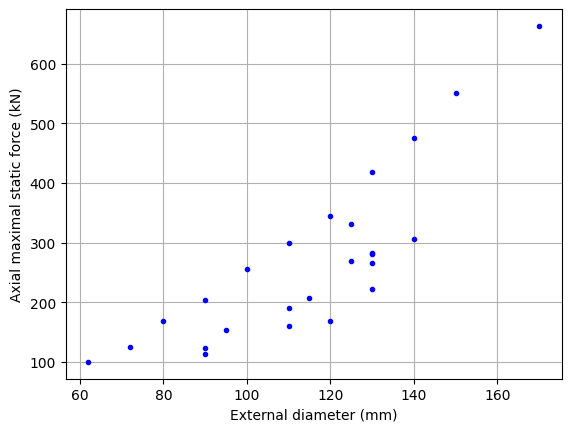

In [3]:
# import plot functions from the mtplotlib package
import matplotlib.pyplot as plt

# plot
g, ax = plt.subplots(1, 1, sharex=True)
ax.plot(df["D"], df["Fa axial static"], ".b")
ax.set_ylabel("Axial maximal static force (kN)")
ax.set_xlabel("External diameter (mm)")
ax.grid()

It is interesting to clean this data in order to keep only the components representative of the problem considered. For this purpose, Pareto filtering is used where only dominant components are kept. A componant dominate another if the first is not inferior to the second in all selected objectives. Here the objective is small diameter and high maximum static force.


In [4]:
# This function tests if a component is dominated
# return 0 if non dominated, the number of domination other else
# inputs :
# x_,y_ : the  component's characteristics to test
# X_,Y_ : the  data set characteristics
def dominated(x_, y_, X_, Y_):
    compteur = 0
    for x, y in zip(X_, Y_):
        # x>x_ for small diameter and  y>y_ for high force
        if (x < x_) and (y > y_):
            compteur += 1
    return compteur


# We create here a new row which will give the information of component dominated or not
df["Dominated"] = False
for i in range(len(df["D"])):
    if (
        dominated(
            df.loc[i, "D"],
            df.loc[i, "Fa axial static"],
            df["D"].values,
            df["Fa axial static"].values,
        )
        > 0
    ):
        df.loc[i, "Dominated"] = True
# Print the new table
df

,d_,D,T,C,Co,Y0,Fa axial static,Pu,Wnom,Wmax,Mass,Dominated
0,25,62,36.5,64.4,80,0.8,100,8.65,6000,11000,0.55,False
1,30,72,41.5,80.9,100,0.8,125,11.40,5300,9500,0.85,False
2,35,80,45.5,105.0,134,0.8,168,15.60,4500,8500,1.10,False
3,40,90,50.5,146.0,163,0.8,204,19.00,4500,7500,1.50,False
4,45,100,54.5,180.0,204,0.8,255,24.50,4000,6700,2.00,False
5,50,90,43.5,130.0,183,1.6,114,20.80,4500,7500,1.10,True
6,50,110,58.5,208.0,240,0.8,300,28.50,3600,6000,2.60,False
7,55,90,54.0,180.0,270,2.2,123,30.50,4500,7000,1.35,True
8,55,120,63.0,209.0,275,0.8,344,33.50,3000,5600,3.30,False
9,60,95,46.0,163.0,245,1.6,153,27.00,4300,6700,1.90,True


The Pareto front component are now ploted in red. 

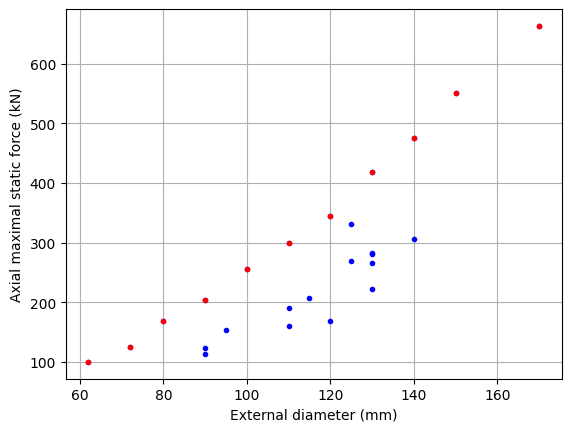

In [5]:
# We keep only the non dominated component (Pareto front)
df_filter = df[df["Dominated"] == False]
# Diameter of filtered bearings
df_filter_D = df_filter["D"]
# Axial force of filtered bearings
df_filter_F = df_filter["Fa axial static"]

# plot of the data set with the Pareto front
g, ax = plt.subplots(1, 1, sharex=True)
ax.plot(df["D"], df["Fa axial static"], ".b", df_filter_D, df_filter_F, ".r")
ax.set_ylabel("Axial maximal static force (kN)")
ax.set_xlabel("External diameter (mm)")
ax.grid()

#### Linear regression

The filtered data will be approximeted here by a linear regression of the form: $Y=aX+b$  

We use here :
- the functions of the [scikit-learn](http://scikit-learn.org) package ([linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))
- a log transformation in order to linearize the power law expression $Y=k.X^a$  into $log(Y) = log(k) + a.log(X)$

A usefull introduction to machine learning can be found here [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/):
> VanderPlas, J. (2016). Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc."

with examples of [linear regressions](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html).

In [6]:
# Import packages
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

# Create a new object for the linear regression
reg = linear_model.LinearRegression()

# Get the data :
# - X inputs and Y outputs
# - apply a log transformation in order

X = np.log10(df_filter["D"].values)

Y = np.log10(df_filter["Fa axial static"].values)

# Gives a new shape to an array without changing its data : transform data into array
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

# Realize the data fitting
reg.fit(X, Y)

LinearRegression()

We can now compare the coefficients of linear regression with scaling laws:

In [7]:
print("The coefficient are:", reg.coef_)
print("The intercept is:", reg.intercept_)
print("The estimation model is: F_axial_max = %.2e.D^%.1f" % (10**reg.intercept_, reg.coef_))

The coefficient are: [[1.91448233]]
The intercept is: [-1.43355268]
The estimation model is: F_axial_max = 3.69e-02.D^1.9


Remark : unit of $D$ is $mm$ and F$_{axial,max}$ is $kN$

We can also directly compare on a graphic the both expressions:

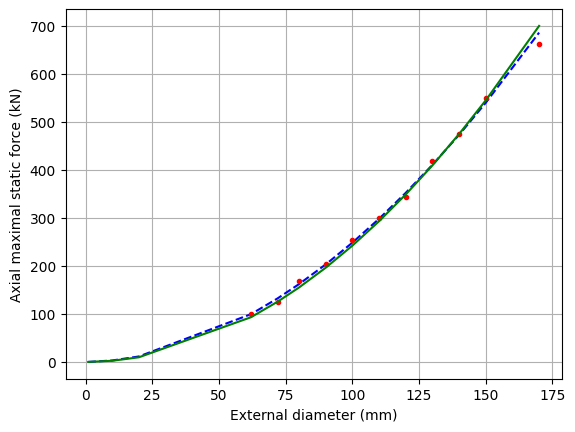

In [8]:
# Add 1 mm diameter point
Xa = np.insert(X, 0, np.log10([1, 10, 20])).reshape(-1, 1)
# The predict function calculate the output with the regression
Yest = reg.predict(Xa)

# Scaling law
Yscal = F_axial_ref * (10**Xa / D_ref) ** 2

# plot
h, ax = plt.subplots(1, 1, sharex=True)
ax.plot(10**Xa, 10**Yest, "--b", 10**X, 10**Y, ".r", 10**Xa, Yscal, "g")
ax.set_ylabel("Axial maximal static force (kN)")
ax.set_xlabel("External diameter (mm)")
ax.grid()

In [9]:
10 ** reg.predict([[np.log10(90)]])

array([[203.14683888]])